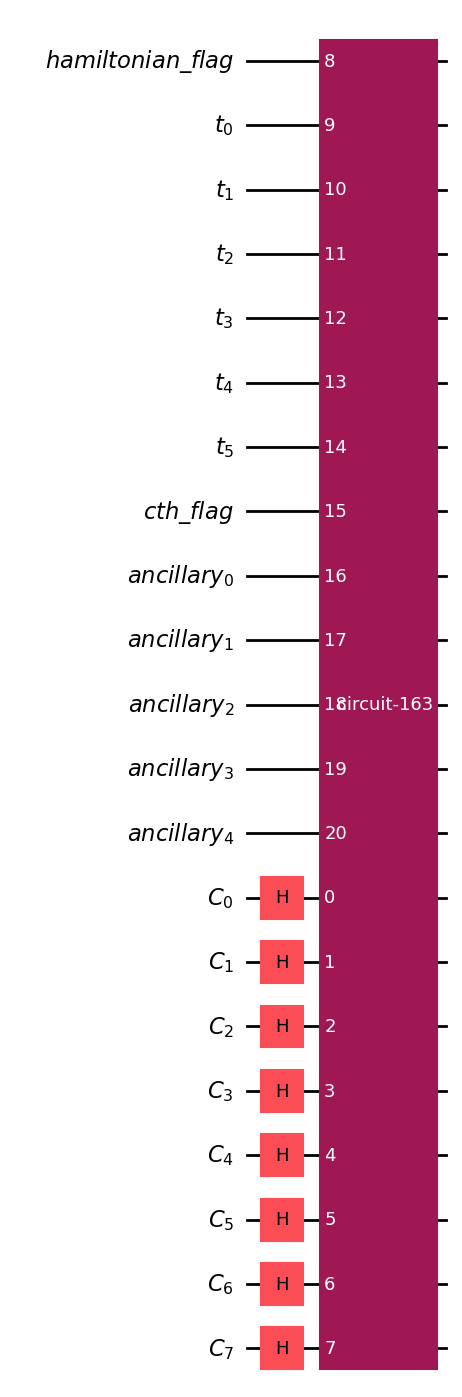

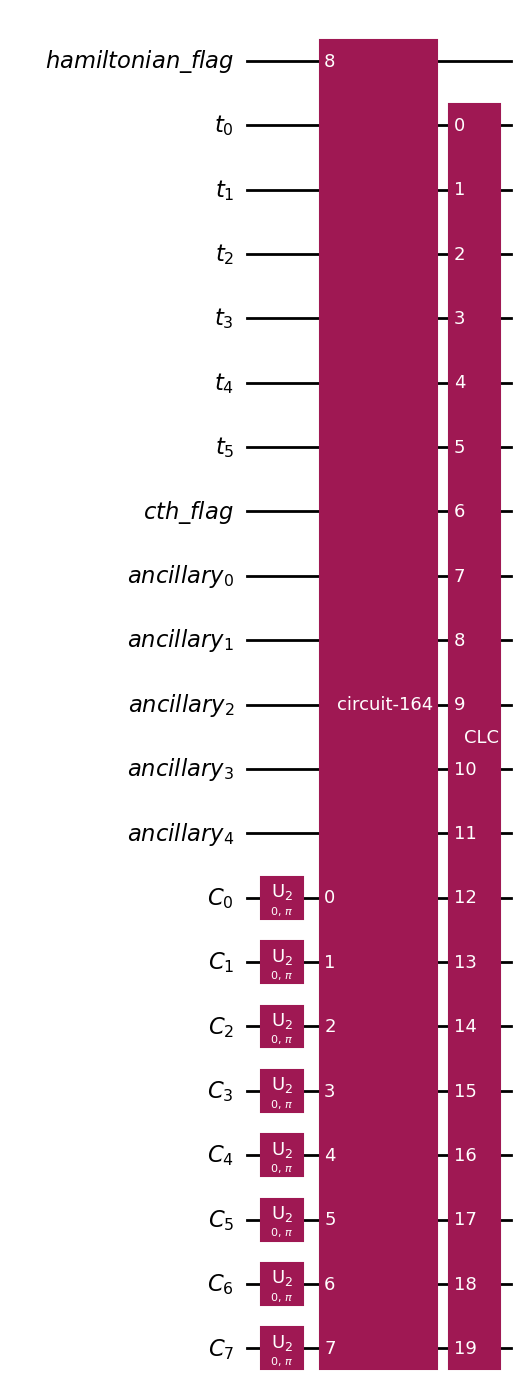

Output from HCD CLC Test||||
cycle|precision|cth_flag|hamiltonian_flag|phase
00000000|001000| 1| 0| 0
00000001|001010| 1| 0| 0
00000010|001001| 1| 0| 0
00000011|001100| 1| 0| 0
00000100|000100| 1| 0| 0
00000101|000110| 1| 0| 0
00000110|000101| 1| 0| 0
00000111|001000| 1| 0| 0
00001000|000110| 1| 0| 0
00001001|001000| 1| 0| 0
00001010|000111| 1| 0| 0
00001011|001010| 1| 0| 0
00001100|000101| 1| 0| 0
00001101|000111| 1| 0| 0
00001110|000110| 1| 0| 0
00001111|001001| 1| 0| 0
00010000|001010| 1| 0| 0
00010001|001100| 1| 0| 0
00010010|001011| 1| 0| 0
00010011|001110| 0| 0| 0
00010100|000110| 1| 0| 0
00010101|001000| 1| 0| 0
00010110|000111| 1| 0| 0
00010111|001010| 1| 0| 0
00011000|001000| 1| 0| 0
00011001|001010| 1| 0| 0
00011010|001001| 1| 0| 0
00011011|001100| 1| 0| 0
00011100|000111| 1| 0| 0
00011101|001001| 1| 0| 0
00011110|001000| 1| 0| 0
00011111|001011| 1| 0| 0
00100000|000110| 1| 0| 0
00100001|001000| 1| 0| 0
00100010|000111| 1| 0| 0
00100011|001010| 1| 0| 0
00100100|000010| 1| 0| 

In [1]:
import warnings
warnings.filterwarnings("ignore")


from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import Aer
from hcd_clc import create_hcd_clc_oracle
import numpy as np
from numpy import pi


# --- Parameters ---
t = 6  # number of precision qubits
threshold = 13  # threshold in phase units (0–63 since t=6)


theta_matrix = np.array([
    [0, pi/16, pi/32, pi/8],  # distances from city 0
    [pi/8, 0, pi/16, pi/32],  # distances from city 1
    [pi/16, pi/8, 0, pi/16],  # distances from city 2
    [pi/16, pi/32, pi/8, 0]   # distances from city 3
])


# --- Quantum Registers ---
precision = QuantumRegister(t, 't')        # Phase estimation qubits
cth_flag = QuantumRegister(1, 'cth_flag')          # Marking solutions which are under the threshold
hamiltonian_flag = QuantumRegister(1, 'hamiltonian_flag')
ancillary = QuantumRegister(5, 'ancillary')
cycle = QuantumRegister(8, 'C')            # Cycle qubits


qc = QuantumCircuit(hamiltonian_flag,precision, cth_flag, ancillary, cycle)
qc.h(cycle)
clc_hcd = create_hcd_clc_oracle(theta_matrix, t, threshold)
qc.append(clc_hcd,[*cycle, *hamiltonian_flag, *precision, *cth_flag, *ancillary])


display(qc.draw("mpl"))
display(qc.decompose().draw("mpl"))

# Simulate the statevector
backend = Aer.get_backend('statevector_simulator')
compiled = transpile(qc, backend)
result = backend.run(compiled).result()
state = result.get_statevector()

print("Output from HCD CLC Test||||")
print("cycle|precision|cth_flag|hamiltonian_flag|phase")
for i,amp in enumerate(state):
    if abs(amp) > 1e-6:
        bin_str = format(i, f'0{21}b')
        # print(bin_str)
        hamiltonian_flag = bin_str[20]
        t_bits   = bin_str[14:20][::-1]
        cth_flag_bit = bin_str[13]
        ancillary_flag_bits = bin_str[8:13]
        cycle_bits = bin_str[0:8]
        phase = np.angle(amp)
        eps = 1e-10
        if abs(phase) < eps:
            phase = 0
        print(f"{cycle_bits}|{t_bits}| {cth_flag_bit}| {hamiltonian_flag}| {phase}")